In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,business_id,date,review_id,text,stars,type,user_id,cool,useful,funny
0,n-Q7d10K0h6PyNewmiHLyg,2011-04-04,N3Ut6LtL3lIOfTZDNzR-AA,Phoenix Muni is a great stadium to see Oakland...,4,review,gVgbIRT9mJkeWSAzBA9i6g,0,2,0
1,NKMyRG-hK6_HNMlckY7Hxw,2012-05-14,0MAj6HuvWTlvvg428kPloQ,I came here for the first time ever on Mother'...,5,review,F6QsMoJdvtohlbnST-fDyQ,1,2,2
2,RFeDe3fNr14kvUKlVx6_4w,2010-06-15,G2OVqZAkNl5OBrzeTrX8hA,This was the first Thai I have had and it did ...,4,review,Qz_WQ6blpBBSaEwsofbB_w,0,1,0
3,YKOvlBNkF4KpUP9q7x862w,2009-03-04,ES4-S0n_LN5PmtJHmiwf8g,I was toying with the idea of going on the wag...,4,review,gvXV0RHOxI_WhT91LMPNNQ,3,2,2
4,itpHJcXW0PXNsdTbbKMfpA,2012-09-30,RFcu-xmzE52r93kIO4CeEg,"I love my eye doctor! Platonically, of course...",5,review,lKze8Z4vzqgN5R8Bq8F_vA,0,0,0


In [3]:
df.shape

(8000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
business_id    8000 non-null object
date           8000 non-null object
review_id      8000 non-null object
text           8000 non-null object
stars          8000 non-null int64
type           8000 non-null object
user_id        8000 non-null object
cool           8000 non-null int64
useful         8000 non-null int64
funny          8000 non-null int64
dtypes: int64(4), object(6)
memory usage: 625.1+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.770375,0.868625,1.404500,0.696000
std,1.220485,2.089536,2.352301,1.926732
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df["msglength"] = df["text"].apply(len)
df.head()

,business_id,date,review_id,text,stars,type,user_id,cool,useful,funny,msglength
0,n-Q7d10K0h6PyNewmiHLyg,2011-04-04,N3Ut6LtL3lIOfTZDNzR-AA,Phoenix Muni is a great stadium to see Oakland...,4,review,gVgbIRT9mJkeWSAzBA9i6g,0,2,0,717
1,NKMyRG-hK6_HNMlckY7Hxw,2012-05-14,0MAj6HuvWTlvvg428kPloQ,I came here for the first time ever on Mother'...,5,review,F6QsMoJdvtohlbnST-fDyQ,1,2,2,915
2,RFeDe3fNr14kvUKlVx6_4w,2010-06-15,G2OVqZAkNl5OBrzeTrX8hA,This was the first Thai I have had and it did ...,4,review,Qz_WQ6blpBBSaEwsofbB_w,0,1,0,838
3,YKOvlBNkF4KpUP9q7x862w,2009-03-04,ES4-S0n_LN5PmtJHmiwf8g,I was toying with the idea of going on the wag...,4,review,gvXV0RHOxI_WhT91LMPNNQ,3,2,2,617
4,itpHJcXW0PXNsdTbbKMfpA,2012-09-30,RFcu-xmzE52r93kIO4CeEg,"I love my eye doctor! Platonically, of course...",5,review,lKze8Z4vzqgN5R8Bq8F_vA,0,0,0,1137


[(0, 3000)]

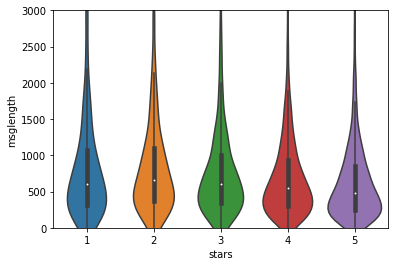

In [7]:
vplot = sns.violinplot("stars","msglength",data = df)
vplot.set(ylim=(0, 3000))

In [8]:
corr = df.corr().loc['msglength','stars']
print("Correlation coefficient between Message length and stars: "+str(corr))

Correlation coefficient between Message length and stars: -0.10737438801390016


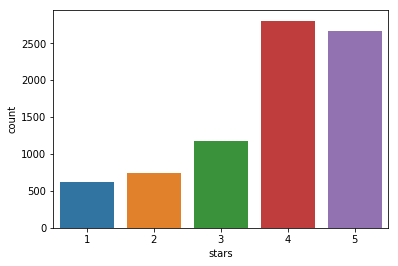

In [9]:
sns.countplot(df["stars"])

In [10]:
x = df["text"]
y = df["stars"]
x[0:5]

0    Phoenix Muni is a great stadium to see Oakland...
1    I came here for the first time ever on Mother'...
2    This was the first Thai I have had and it did ...
3    I was toying with the idea of going on the wag...
4    I love my eye doctor!  Platonically, of course...
Name: text, dtype: object

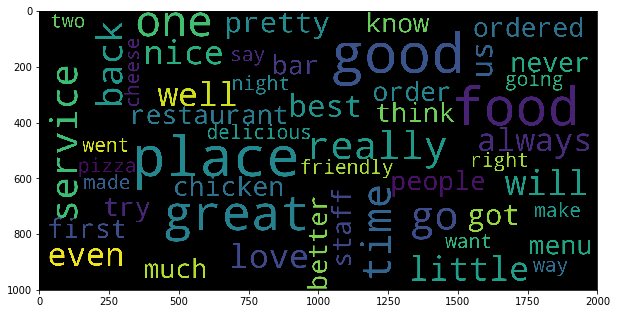

In [11]:
from wordcloud import WordCloud
positive_list = [word for line in x for word in line.split()]
positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))
plt.figure(figsize=(10,10))
plt.imshow(positive_cloud)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)
x[0:5]

<5x26414 sparse matrix of type '<class 'numpy.int64'>'
	with 508 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [14]:
nb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [17]:
model = clf.fit(x, y)

In [18]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x, y) 

In [19]:
df1 = pd.read_csv("test.csv")
df1.head()

,Unnamed: 0,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,0,UFfYVoK3RwDVo9eb70Fh9w,19-10-2007,C-reF7nMYNitSPknENhr-g,4,"Creamy, luscious, divine...just some of the wo...",review,1S7XdhbZWR17Wy4TBsIzaw,2,2,0
1,1,ke3RFq3mHEAoJE_kkRNhiQ,21-07-2012,W2E-KyisRMC5fuih1AjTlA,4,I found this place when we needed a place to m...,review,lAngRi4lwBIHmjCBVLd-8Q,0,2,0
2,2,pQ3kRVmttsV1bHxuTf7TAg,24-03-2010,OyisBZlWvyjZNXF_T5zOLw,4,"Love this place. Great selection of beers, ch...",review,IJKdg7KSekmIm_6LJsfvUw,0,0,0
3,3,8m08a9xJKmANwmeuR-0bPA,07-09-2011,k_irkIDyZ9_bDeE4J29u0g,4,I went here last night with my wife to celebra...,review,rLtl8ZkDX5vH5nAx9C3q5Q,1,3,1
4,4,Bc4DoKgrKCtCuN-0O5He3A,26-05-2011,JE4qCKrv0447TJ6JN5wzOw,5,WOW! Carmel sundae was amazing!,review,ADMub7n217L0nKnUm_liUQ,3,0,0


In [20]:
df1.shape

(1000, 11)

In [21]:
x1 = df1["text"]
y1 = df1["stars"]
x1[0:5]

0    Creamy, luscious, divine...just some of the wo...
1    I found this place when we needed a place to m...
2    Love this place.  Great selection of beers, ch...
3    I went here last night with my wife to celebra...
4                      WOW! Carmel sundae was amazing!
Name: text, dtype: object

In [22]:
x1 = cv.transform(x1)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
predictions = nb.predict(x1)

In [25]:
predLog = model.predict(x1)

In [26]:
svm_predictions = svm_model_linear.predict(x1)

In [27]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [28]:
y_finalpred = []

In [29]:
for i in range(len(predictions)):
    arr = [predictions[i],predLog[i],svm_predictions[i]]
    y_finalpred.append(most_common(arr))

In [30]:
confusion_matrix(y1,y_finalpred)

array([[ 59,   2,   0,   1,   0],
       [  3,  71,   1,   1,   1],
       [  3,   9,  82,   3,   0],
       [  0,   2,   3, 368,   4],
       [  2,   3,   4,  13, 365]], dtype=int64)

In [49]:
acc = accuracy_score(y1,y_finalpred)*100
print("Accuracy - "+str(acc)+"%")

Accuracy - 94.5%


In [32]:
import requests
import json
response = requests.get("http://amazonreviews.herokuapp.com/find/?url=https://www.amazon.in/Bourge-Loire-63-Running-Shoes-9-Loire-63-D-Grey-09/dp/B07MPZ1B3C/ref=sr_1_1?dchild=1&pf_rd_i=1983518031&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_p=b8302fe4-3f0c-4b7b-a1fa-4fd1d8135ef9&pf_rd_r=T6ERRQETRHD9WJCZ1ZE7&pf_rd_s=merchandised-search-6&qid=1618578195&s=shoes&sr=1-1")
print(response.json())

{'0': {'title': 'Memory cushioning in these shoes is the best feature!', 'comment': 'I had purchased Asian brand shoes earlier for walking. They were not fitting properly so i returned them and purchased these shoes. I have to say, these are way better in terms of cushioning and fitting. No more strain to the foot while walking/running.'}, '1': {'title': 'Poor quality product', 'comment': 'this is very poor quality product and total waste of money. Soul is very thin and almost feels like my feet are touching the floor. The inside part of the shoe has thin layer which is not even pasted and cardboard underneath is directly visible.Disgusting quality.'}, '2': {'title': 'Memory cushioning in these shoes is the best feature!', 'comment': "I used to gym daily. This is the best fit for gym especially running on treadmill.I'm using for office also. Very light weight.Easy to wear. Just go for it"}, '3': {'title': 'Poor quality product', 'comment': 'Awesome product..The appearance was very good

In [33]:
data = []
for i in response.json().keys():
    data.append(response.json()[i]['comment'])
data[0:5]

['I had purchased Asian brand shoes earlier for walking. They were not fitting properly so i returned them and purchased these shoes. I have to say, these are way better in terms of cushioning and fitting. No more strain to the foot while walking/running.',
 'this is very poor quality product and total waste of money. Soul is very thin and almost feels like my feet are touching the floor. The inside part of the shoe has thin layer which is not even pasted and cardboard underneath is directly visible.Disgusting quality.',
 "I used to gym daily. This is the best fit for gym especially running on treadmill.I'm using for office also. Very light weight.Easy to wear. Just go for it",
 'Awesome product..The appearance was very good..Weightless..',
 "Product was delivered today as promised one day delivery .  Looks exactly in the picture. I've ordered size 10 and it fits perfectly.  Inside foam is good while walking. Will update my review after i use it frequently .. Thanks"]

In [34]:
amazonr = pd.DataFrame(data, columns = ['Reviews'])
amazonr[0:10]

,Reviews
0,I had purchased Asian brand shoes earlier for ...
1,this is very poor quality product and total wa...
2,I used to gym daily. This is the best fit for ...
3,Awesome product..The appearance was very good....
4,Product was delivered today as promised one da...
5,Very good as expected
6,"This is the Second shoe of same brand, the sol..."
7,Color is bit not as expected but quality and f...
8,"Good. But, a bit oversized. Believing the desc..."
9,You're Awesome Amazon Thank You Sooooooooooo M...


In [35]:
len(amazonr)

50

In [36]:
amazont = cv.transform(amazonr['Reviews'])
amazont

<50x26414 sparse matrix of type '<class 'numpy.int64'>'
	with 1686 stored elements in Compressed Sparse Row format>

In [37]:
amazonpredict = []

In [38]:
predictions = nb.predict(amazont)

In [39]:
predLog = model.predict(amazont)

In [40]:
svm_predictions = svm_model_linear.predict(amazont)

In [41]:
for i in range(len(predictions)):
    arr = [predictions[i],predLog[i],svm_predictions[i]]
    amazonpredict.append(most_common(arr))

In [42]:
resultdf = pd.DataFrame({'Reviews':amazonr['Reviews'], 'Rating':amazonpredict})

In [43]:
avgrating = sum(amazonpredict)/len(amazonr)
print("Final Average Rating - "+str(avgrating))

Final Average Rating - 3.38


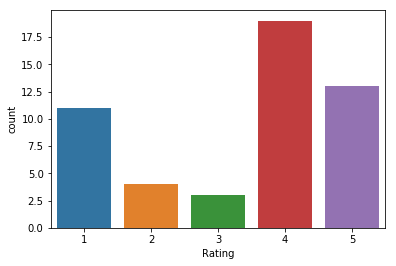

In [44]:
sns.countplot(resultdf["Rating"])

In [45]:
resultdf

,Reviews,Rating
0,I had purchased Asian brand shoes earlier for ...,5
1,this is very poor quality product and total wa...,1
2,I used to gym daily. This is the best fit for ...,4
3,Awesome product..The appearance was very good....,4
4,Product was delivered today as promised one da...,4
5,Very good as expected,4
6,"This is the Second shoe of same brand, the sol...",4
7,Color is bit not as expected but quality and f...,4
8,"Good. But, a bit oversized. Believing the desc...",4
9,You're Awesome Amazon Thank You Sooooooooooo M...,5


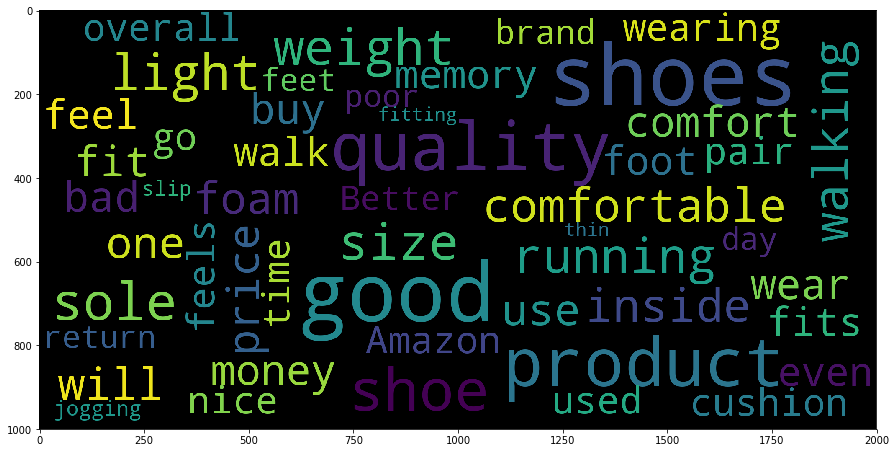

In [46]:
from wordcloud import WordCloud
positive = resultdf['Reviews']
positive_list = [word for line in positive for word in line.split()]
positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))
plt.figure(figsize=(15,10))
plt.imshow(positive_cloud)